In [138]:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import norm 
import timeit
import matplotlib.pyplot as plt
import scipy.linalg

In [110]:
### Real hermitian matrix
def generate_real_symmetric_matrix(n):
    A = np.empty((n, n))
    for i in range(n):
        for j in range(i, n):
            A[i, j] = np.random.uniform()
            A[j, i] = A[i, j]

    return A

In [74]:
def power_iteration(A, max_iterations = 100, eps = 1e-9):
    x_0 = np.random.rand(A.shape[1])
    x_0 = x_0 / norm(x_0)

    x_k = x_0
    iter_count = 0
    while True:
        iter_count += 1
        y_k = A @ x_k
        x_k_next = y_k / norm(y_k)

        if norm(x_k_next - x_k) < eps or iter_count >= max_iterations:
            eigen_vector = x_k_next
            eigen_value  = np.dot(x_k_next, y_k)

            return eigen_vector, eigen_value

        x_k = x_k_next

### Comparison of results between library implementation

Seems to be accurate.

In [94]:
A = generate_real_symmetric_matrix(3)
eig_vec, eig_val = power_iteration(A)

np_eigs = np.linalg.eig(A)
i       = np.argmax(np_eigs[0])
np_eig_val, np_eig_vec  = np_eigs[0][i], np_eigs[1][:,i]

print('Eigen value')
print(eig_val, 'vs', np_eig_val)
print('Eigen vector')
print(eig_vec, 'vs', np_eig_vec)

Eigen value
1.9987308082239321 vs 1.9987308082239308
Eigen vector
[0.64836148 0.55286257 0.52342179] vs [-0.64836148 -0.55286257 -0.52342179]


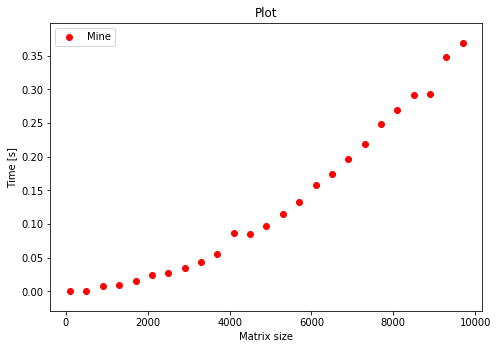

In [105]:
xs, ys, zs = [], [], []
for n in range(100, 10000, 400):
    A = generate_real_symmetric_matrix(n)

    def closure():
        return power_iteration(A)

    xs.append(n)
    ys.append(timeit.timeit(closure, number = 1))

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(xs, ys, color='r', label = 'Mine')
ax.set_xlabel('Matrix size')
ax.set_ylabel('Time [s]')
ax.set_title('Plot')
ax.legend()

plt.show()

In [130]:
def inverse_power_method(A, sigma, max_iterations = 100, eps = 1e-9):
    x_0 = np.random.rand(A.shape[1])
    x_0 = x_0 / norm(x_0)

    plu = scipy.linalg.lu_factor(A - sigma * np.identity(A.shape[1]))

    x_k = x_0
    iter_count = 0
    while True:
        iter_count += 1
        y_k = scipy.linalg.lu_solve(plu, x_k)
        x_k_next = y_k / norm(y_k)

        if norm(x_k_next - x_k) < eps or iter_count >= max_iterations:
            eigen_vector = x_k_next

            return eigen_vector

        x_k = x_k_next

In [137]:
A = generate_real_symmetric_matrix(3)
_, eigen_value = power_iteration(A)
eigen_vector = inverse_power_method(A, eigen_value)

print('Checking eigen value/vector property.')
print(A @ eigen_vector)
print(eigen_value * eigen_vector)

Checking eigen value/vector property.
[0.6757541  0.86339172 0.73826494]
[0.6757541  0.86339172 0.73826494]


In [165]:
def rayleigh_quotient_iteration(A, max_iterations = 100, eps = 1e-6):
    b_0 = np.random.rand(A.shape[1])
    b_0 = b_0 / norm(b_0)

    b_k = b_0
    mu_k = np.random.uniform()
    iter_count = 0
    while True:
        iter_count += 1
        y_k = inv(A - mu_k * np.identity(A.shape[1])) @ b_k
        b_k = y_k / norm(y_k)

        # Rayleigh quotient.
        mu_k = (b_k @ A @ b_k.reshape(-1, 1)) / (np.dot(b_k, b_k))
        if norm((A @ b_k) - (mu_k * b_k)) < eps or iter_count >= max_iterations:
            eigen_vector = b_k
            eigen_value  = mu_k

            return eigen_vector, eigen_value
   

In [184]:
A = generate_real_symmetric_matrix(5)
# _, eigen_value = power_iteration(A)
# eigen_vector = inverse_power_method(A, eigen_value)
eigen_vector, eigen_value = rayleigh_quotient_iteration(A)

print('Checking eigen value/vector property.')
print(A @ eigen_vector)
print(eigen_value * eigen_vector)

Checking eigen value/vector property.
[ 0.03762835 -0.51486379  0.04320043  0.35846641 -0.05678221]
[ 0.03762835 -0.51486379  0.04320043  0.35846641 -0.05678221]


## Convergence comparison
- Rayleigh quotient iteration converges cubically given vector that is sufficiently close to an eigenvector. If our initial guess is not close algorithm might take a lot of time due to cost of calculating inverse. When our guess is close no more than few iterations are required.

- Power Iteration convergence is linear. It might be inefficient for large full matrices due to matrix multiplication, but quite fast for sparse matrices.


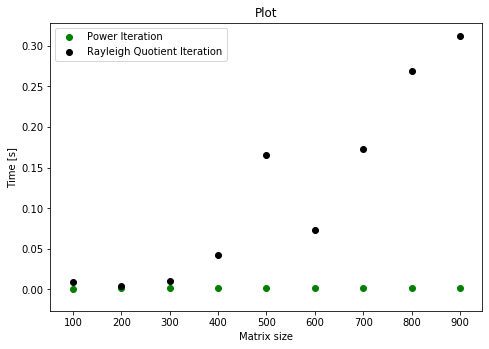

In [197]:
import time

xs, ys, zs = [], [], []
for n in range(100, 1000, 100):
    A = generate_real_symmetric_matrix(n)
    
    start = time.time()
    rayleigh_quotient_iteration(A)
    zs.append(time.time() - start)

    start = time.time()
    power_iteration(A)
    ys.append(time.time() - start)
    xs.append(n)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(xs, ys, color='g', label = 'Power Iteration')
ax.scatter(xs, zs, color='black', label = 'Rayleigh Quotient Iteration')
ax.set_xlabel('Matrix size')
ax.set_ylabel('Time [s]')
ax.set_title('Plot')
ax.legend()

plt.show()

Rayleigh takes more time since we guessed poorly.